In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

In [2]:
# Load the parquet file into a pandas DataFrame
df = pd.read_parquet('dataforanalysing.parquet')

In [3]:
# Load the original taxi parquet file into a pandas DataFrame
df1 = pd.read_parquet('combined_yellowTaxi.parquet')

In [4]:
df.shape

(34363478, 18)

In [5]:
# Load the data
zones = pd.read_csv('taxi_zones.csv')

In [6]:
zones.shape

(263, 7)

In [7]:
nan_count = df.isna().sum().sum()
nan_count

0

In [8]:
# Filter for Manhattan
manhattan_zones = zones[zones['borough'] == 'Manhattan']

In [9]:
# Extract location IDs
manhattan_ids = manhattan_zones['LocationID'].tolist()
manhattan_ids = [x for x in manhattan_ids if x != 103]
manhattan_ids

[4,
 24,
 12,
 13,
 41,
 45,
 42,
 43,
 48,
 50,
 68,
 79,
 74,
 75,
 87,
 88,
 90,
 125,
 100,
 107,
 113,
 114,
 116,
 120,
 127,
 128,
 151,
 140,
 137,
 141,
 142,
 152,
 143,
 144,
 148,
 153,
 158,
 161,
 162,
 163,
 164,
 170,
 166,
 186,
 194,
 202,
 209,
 211,
 224,
 229,
 230,
 231,
 239,
 232,
 233,
 234,
 236,
 237,
 238,
 263,
 243,
 244,
 246,
 249,
 261,
 262]

In [10]:
unique_count = len(set(manhattan_ids))
unique_count

66

In [11]:
# Return the first 10 rows.
df.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_month,dropoff_month,holiday,week,day_type,dropoff_timeslots,pickup_timeslots,season,passenger
0,2022-01-01,2022-01-01 00:53:29,2.0,142,236,2022-01-01,00:00:00,2022-01-01,00:00:00,January,January,False,5,weekend,Late Night,Late Night,winter,small
1595198,2022-01-21,2022-01-21 23:52:34,1.0,48,68,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595197,2022-01-21,2022-01-21 23:28:27,1.0,239,151,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595196,2022-01-21,2022-01-21 23:16:47,1.0,229,238,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595195,2022-01-21,2022-01-21 23:12:43,2.0,141,230,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595194,2022-01-21,2022-01-22 00:04:11,1.0,48,234,2022-01-21,23:00:00,2022-01-22,00:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595193,2022-01-21,2022-01-21 23:29:44,2.0,236,166,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595192,2022-01-21,2022-01-22 00:03:34,1.0,125,246,2022-01-21,23:00:00,2022-01-22,00:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595191,2022-01-21,2022-01-21 23:48:25,1.0,249,231,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595190,2022-01-21,2022-01-21 23:41:28,1.0,68,249,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small


In [12]:
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].dt.date

In [13]:
# Return the first 10 rows.
df.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_month,dropoff_month,holiday,week,day_type,dropoff_timeslots,pickup_timeslots,season,passenger
0,2022-01-01,2022-01-01,2.0,142,236,2022-01-01,00:00:00,2022-01-01,00:00:00,January,January,False,5,weekend,Late Night,Late Night,winter,small
1595198,2022-01-21,2022-01-21,1.0,48,68,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595197,2022-01-21,2022-01-21,1.0,239,151,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595196,2022-01-21,2022-01-21,1.0,229,238,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595195,2022-01-21,2022-01-21,2.0,141,230,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595194,2022-01-21,2022-01-22,1.0,48,234,2022-01-21,23:00:00,2022-01-22,00:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595193,2022-01-21,2022-01-21,2.0,236,166,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595192,2022-01-21,2022-01-22,1.0,125,246,2022-01-21,23:00:00,2022-01-22,00:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595191,2022-01-21,2022-01-21,1.0,249,231,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595190,2022-01-21,2022-01-21,1.0,68,249,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small


In [14]:
distinct_values_pickup = df['tpep_pickup_datetime'].unique()
print("Unique Values:")
print(distinct_values_pickup)
print("Number of Unique Values for pickup:", len(distinct_values_pickup))

Unique Values:
[datetime.date(2022, 1, 1) datetime.date(2022, 1, 21)
 datetime.date(2022, 1, 22) datetime.date(2022, 1, 20)
 datetime.date(2022, 1, 23) datetime.date(2022, 1, 24)
 datetime.date(2022, 1, 18) datetime.date(2022, 1, 19)
 datetime.date(2022, 1, 17) datetime.date(2022, 1, 28)
 datetime.date(2022, 1, 29) datetime.date(2022, 1, 30)
 datetime.date(2022, 1, 27) datetime.date(2022, 1, 31)
 datetime.date(2022, 1, 25) datetime.date(2022, 1, 26)
 datetime.date(2022, 1, 6) datetime.date(2022, 1, 7)
 datetime.date(2022, 1, 5) datetime.date(2022, 1, 8)
 datetime.date(2022, 1, 9) datetime.date(2022, 1, 2)
 datetime.date(2022, 1, 3) datetime.date(2022, 1, 4)
 datetime.date(2022, 1, 14) datetime.date(2022, 1, 15)
 datetime.date(2022, 1, 13) datetime.date(2022, 1, 16)
 datetime.date(2022, 1, 10) datetime.date(2022, 1, 11)
 datetime.date(2022, 1, 12) datetime.date(2022, 2, 19)
 datetime.date(2022, 2, 20) datetime.date(2022, 2, 22)
 datetime.date(2022, 2, 18) datetime.date(2022, 2, 21)
 dat

In [15]:
distinct_values_dropoff = df['tpep_dropoff_datetime'].unique()
print("Unique Values:")
print(distinct_values_dropoff)
print("Number of Unique Values for dropoff:", len(distinct_values_dropoff))

Unique Values:
[datetime.date(2022, 1, 1) datetime.date(2022, 1, 21)
 datetime.date(2022, 1, 22) datetime.date(2022, 1, 23)
 datetime.date(2022, 1, 20) datetime.date(2022, 1, 24)
 datetime.date(2022, 1, 25) datetime.date(2022, 1, 18)
 datetime.date(2022, 1, 19) datetime.date(2022, 1, 17)
 datetime.date(2022, 1, 28) datetime.date(2022, 1, 29)
 datetime.date(2022, 1, 31) datetime.date(2022, 1, 30)
 datetime.date(2022, 1, 27) datetime.date(2022, 2, 1)
 datetime.date(2022, 1, 26) datetime.date(2022, 1, 6)
 datetime.date(2022, 1, 7) datetime.date(2022, 1, 8)
 datetime.date(2022, 1, 5) datetime.date(2022, 1, 9)
 datetime.date(2022, 1, 10) datetime.date(2022, 1, 11)
 datetime.date(2022, 1, 2) datetime.date(2022, 1, 3)
 datetime.date(2022, 1, 4) datetime.date(2022, 1, 14)
 datetime.date(2022, 1, 15) datetime.date(2022, 1, 16)
 datetime.date(2022, 1, 13) datetime.date(2022, 1, 12)
 datetime.date(2022, 2, 19) datetime.date(2022, 2, 20)
 datetime.date(2022, 2, 21) datetime.date(2022, 2, 22)
 date

In [16]:
# Return the first 10 rows.
df.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_month,dropoff_month,holiday,week,day_type,dropoff_timeslots,pickup_timeslots,season,passenger
0,2022-01-01,2022-01-01,2.0,142,236,2022-01-01,00:00:00,2022-01-01,00:00:00,January,January,False,5,weekend,Late Night,Late Night,winter,small
1595198,2022-01-21,2022-01-21,1.0,48,68,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595197,2022-01-21,2022-01-21,1.0,239,151,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595196,2022-01-21,2022-01-21,1.0,229,238,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595195,2022-01-21,2022-01-21,2.0,141,230,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595194,2022-01-21,2022-01-22,1.0,48,234,2022-01-21,23:00:00,2022-01-22,00:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595193,2022-01-21,2022-01-21,2.0,236,166,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595192,2022-01-21,2022-01-22,1.0,125,246,2022-01-21,23:00:00,2022-01-22,00:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595191,2022-01-21,2022-01-21,1.0,249,231,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595190,2022-01-21,2022-01-21,1.0,68,249,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small


In [17]:
# Return the first 10 rows for original dataframe.
df1.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.00,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.00,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.00,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.00,0.3,30.30,2.5,0.0
5,1,2022-01-01 00:40:15,2022-01-01 01:09:48,1.0,10.30,1.0,N,138,161,1,33.0,3.0,0.5,13.00,6.55,0.3,56.35,2.5,0.0
6,2,2022-01-01 00:20:50,2022-01-01 00:34:58,1.0,5.07,1.0,N,233,87,1,17.0,0.5,0.5,5.20,0.00,0.3,26.00,2.5,0.0
7,2,2022-01-01 00:13:04,2022-01-01 00:22:45,1.0,2.02,1.0,N,238,152,2,9.0,0.5,0.5,0.00,0.00,0.3,12.80,2.5,0.0
8,2,2022-01-01 00:30:02,2022-01-01 00:44:49,1.0,2.71,1.0,N,166,236,1,12.0,0.5,0.5,2.25,0.00,0.3,18.05,2.5,0.0
9,2,2022-01-01 00:48:52,2022-01-01 00:53:28,1.0,0.78,1.0,N,236,141,2,5.0,0.5,0.5,0.00,0.00,0.3,8.80,2.5,0.0


In [18]:
df.shape

(34363478, 18)

In [19]:
# Filter the dataframe to drop rows where neither PULocationID nor DOLocationID is in the Manhattan ID list
filtered_df = df[(df['PULocationID'].isin(manhattan_ids)) | (df['DOLocationID'].isin(manhattan_ids))]

In [20]:
filtered_df.shape

(32781256, 18)

In [21]:
distinct_PULocationID = filtered_df['PULocationID'].nunique()
distinct_PULocationID

261

In [22]:
filtered_df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_month,dropoff_month,holiday,week,day_type,dropoff_timeslots,pickup_timeslots,season,passenger
0,2022-01-01,2022-01-01,2.0,142,236,2022-01-01,00:00:00,2022-01-01,00:00:00,January,January,False,5,weekend,Late Night,Late Night,winter,small
1595198,2022-01-21,2022-01-21,1.0,48,68,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595197,2022-01-21,2022-01-21,1.0,239,151,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595196,2022-01-21,2022-01-21,1.0,229,238,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
1595195,2022-01-21,2022-01-21,2.0,141,230,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34046940,2022-11-09,2022-11-09,1.0,249,211,2022-11-09,20:00:00,2022-11-09,20:00:00,November,November,False,2,workday,Evening,Evening,autumn,small
34046939,2022-11-09,2022-11-09,3.0,170,113,2022-11-09,20:00:00,2022-11-09,20:00:00,November,November,False,2,workday,Evening,Evening,autumn,medium
34046954,2022-11-09,2022-11-09,1.0,90,48,2022-11-09,20:00:00,2022-11-09,21:00:00,November,November,False,2,workday,Evening,Evening,autumn,small
34046938,2022-11-09,2022-11-09,1.0,162,162,2022-11-09,20:00:00,2022-11-09,20:00:00,November,November,False,2,workday,Evening,Evening,autumn,small


In [23]:
# Convert the 'pickup_date' column to a datetime format:
filtered_df['pickup_date'] = pd.to_datetime(filtered_df['pickup_date'])

# Extract the day of the week using the .dt.day_name() method:
filtered_df['day_of_week'] = filtered_df['pickup_date'].dt.day_name()
filtered_df

/var/folders/c1/0p2g0x9n6fq4khgcrhdld8wr0000gn/T/ipykernel_54731/2593855149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['pickup_date'] = pd.to_datetime(filtered_df['pickup_date'])
/var/folders/c1/0p2g0x9n6fq4khgcrhdld8wr0000gn/T/ipykernel_54731/2593855149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['day_of_week'] = filtered_df['pickup_date'].dt.day_name()


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_month,dropoff_month,holiday,week,day_type,dropoff_timeslots,pickup_timeslots,season,passenger,day_of_week
0,2022-01-01,2022-01-01,2.0,142,236,2022-01-01,00:00:00,2022-01-01,00:00:00,January,January,False,5,weekend,Late Night,Late Night,winter,small,Saturday
1595198,2022-01-21,2022-01-21,1.0,48,68,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small,Friday
1595197,2022-01-21,2022-01-21,1.0,239,151,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small,Friday
1595196,2022-01-21,2022-01-21,1.0,229,238,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small,Friday
1595195,2022-01-21,2022-01-21,2.0,141,230,2022-01-21,23:00:00,2022-01-21,23:00:00,January,January,False,4,workday,Late Night,Late Night,winter,small,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34046940,2022-11-09,2022-11-09,1.0,249,211,2022-11-09,20:00:00,2022-11-09,20:00:00,November,November,False,2,workday,Evening,Evening,autumn,small,Wednesday
34046939,2022-11-09,2022-11-09,3.0,170,113,2022-11-09,20:00:00,2022-11-09,20:00:00,November,November,False,2,workday,Evening,Evening,autumn,medium,Wednesday
34046954,2022-11-09,2022-11-09,1.0,90,48,2022-11-09,20:00:00,2022-11-09,21:00:00,November,November,False,2,workday,Evening,Evening,autumn,small,Wednesday
34046938,2022-11-09,2022-11-09,1.0,162,162,2022-11-09,20:00:00,2022-11-09,20:00:00,November,November,False,2,workday,Evening,Evening,autumn,small,Wednesday


## Plot graph to decide wether to separate two cases holiday=True/False

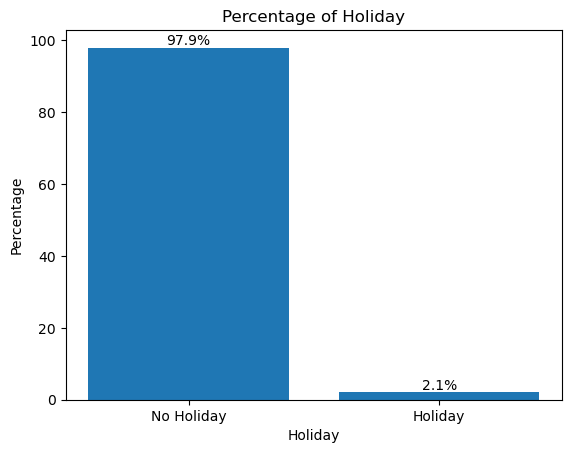

In [24]:
# Calculate the percentage of each category
holiday_percentage = filtered_df['holiday'].value_counts(normalize=True) * 100

# Create a bar plot
plt.bar(['No Holiday', 'Holiday'], holiday_percentage)

# Add labels to the bars
for i, percentage in enumerate(holiday_percentage):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Holiday')
plt.ylabel('Percentage')
plt.title('Percentage of Holiday')

# Display the plot
plt.show()

- As the result shows that "holiday" accounts for 97.9% and "no holiday" accounts for 2.1%, it means that the majority of the data points in the dataset fall into the "holiday" category. On the other hand, the "no holiday" category represents a smaller portion of the data.
- This information indicates that there is a significant imbalance between the occurrence of holidays and non-holidays in the dataset. 
- When building and training the model to predict busyness based on weather and date information, it is necessary to consider calculating and defining busyness levels separately for holiday and non-holiday periods. This approach takes into account the potential differences in taxi activity patterns during these periods.
- By calculating busyness levels separately for holidays and non-holidays, your model can learn and capture the distinct patterns and dynamics exhibited during these periods. This can improve the model's ability to make accurate predictions and provide more meaningful insights specific to holiday and non-holiday situations.
- Additionally, incorporating the holiday feature as a separate input in your model can help capture the influence of holidays on taxi busyness. This can enable your model to learn and incorporate the impact of holidays as a relevant factor in predicting busyness accurately.
- By considering the differences between holiday and non-holiday periods in the model training and predictions, we can enhance the overall performance and relevance of our web application in predicting busyness based on weather and date information.

## Plot graph to see the workday/weekend percentage

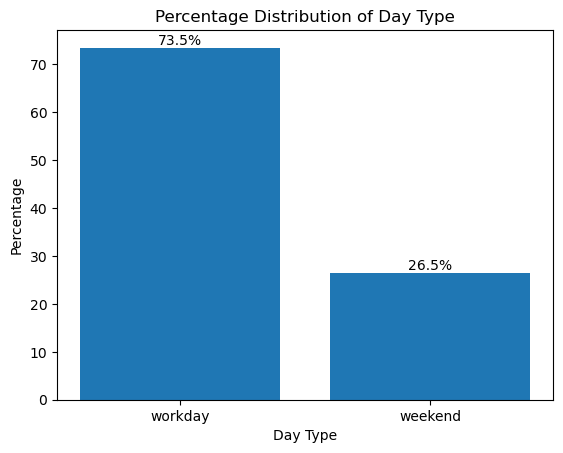

In [25]:
# Calculate the percentage distribution of the 'day_type' feature:
daytype_percentage = filtered_df['day_type'].value_counts(normalize=True) * 100

plt.bar(daytype_percentage.index, daytype_percentage.values)

# Set labels and title
plt.xlabel('Day Type')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Day Type')

# Display the percentage values on the bars
for i, v in enumerate(daytype_percentage.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# Display the plot
plt.show()

- Since weekdays constitute the majority of the dataset (73.5%), it is reasonable to prioritize analyzing traffic busyness during weekdays. This is because weekdays typically have higher traffic volumes due to commuting and work-related activities.

## Plot graph to see the trend of trips

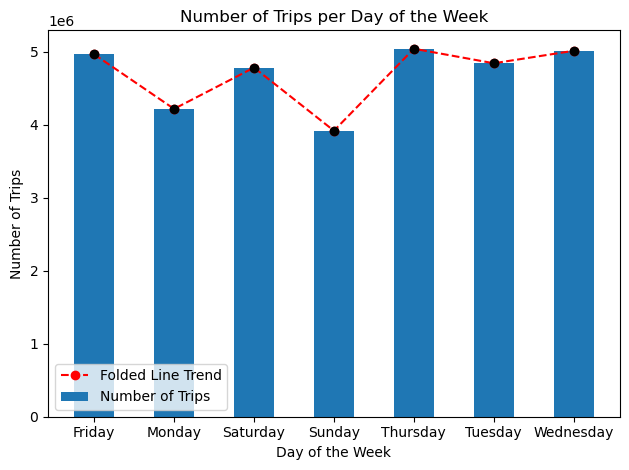

In [26]:
# Calculate the number of trips per day of the week
trips_per_day = filtered_df['day_of_week'].value_counts().sort_index()

# Calculate the rolling average with a window size of 3
rolling_avg = trips_per_day.rolling(window=3, center=True).mean()

# Plot the bar graph with points on top
plt.bar(trips_per_day.index, trips_per_day.values, label='Number of Trips', width=0.5)

# Plot the points on top of each bar
plt.scatter(trips_per_day.index, trips_per_day.values, color='black', zorder=10)

# Connect the points together with a line
plt.plot(trips_per_day.index, trips_per_day.values, marker='o', linestyle='--', color='red', label='Folded Line Trend')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Day of the Week')
plt.legend()

plt.tight_layout()
plt.show()

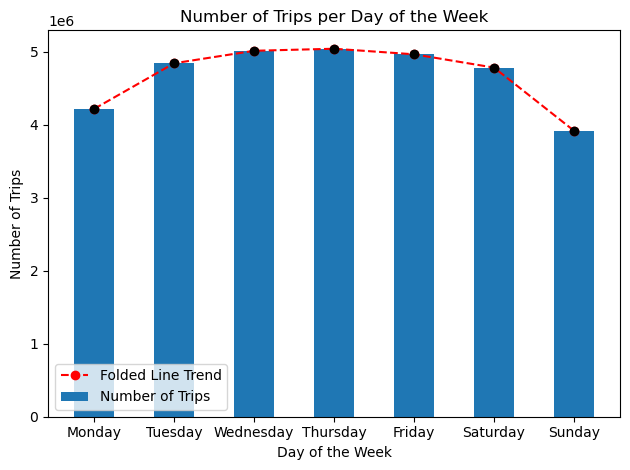

In [27]:
# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the number of trips per day of the week
trips_per_day = filtered_df['day_of_week'].value_counts().sort_index()

# Reorder the trips_per_day DataFrame based on the day_order
trips_per_day = trips_per_day.loc[day_order]

# Calculate the rolling average with a window size of 3
rolling_avg = trips_per_day.rolling(window=3, center=True).mean()

# Create a numpy array for the x-axis positions
x_pos = np.arange(len(day_order))

# Plot the bar graph with points on top
plt.bar(x_pos, trips_per_day.values, label='Number of Trips', width=0.5)

# Plot the points on top of each bar
plt.scatter(x_pos, trips_per_day.values, color='black', zorder=10)

# Connect the points together with a line
plt.plot(x_pos, trips_per_day.values, marker='o', linestyle='--', color='red', label='Folded Line Trend')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Day of the Week')
plt.xticks(x_pos, day_order)  # Set the x-axis labels to the day_order
plt.legend()

plt.tight_layout()
plt.show()


## Plot graph to see the number of pickups as per month

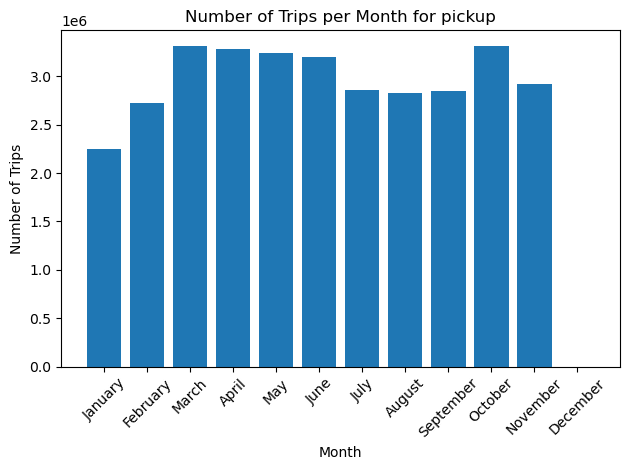

In [28]:
# Calculate the number of trips per 'pickup_month'
trips_per_month = filtered_df['pickup_month'].value_counts().sort_index()

# Plot the graph
plt.bar(trips_per_month.index, trips_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Month for pickup')

# Rotate x-axis tick labels
plt.xticks(rotation=45)

plt.tight_layout()  # Adjusts the layout to prevent overlapping labels

plt.show()

## Plot graph to see the number of pickups as per timeslot

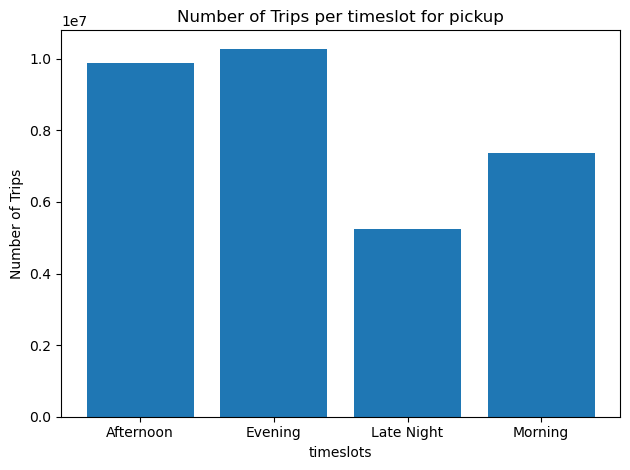

In [29]:
# Calculate the number of trips per 'pickup_timeslots'
trips_per_timeslot = filtered_df['pickup_timeslots'].value_counts().sort_index()

# Plot the graph
plt.bar(trips_per_timeslot.index, trips_per_timeslot.values)
plt.xlabel('timeslots')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per timeslot for pickup')

# # Rotate x-axis tick labels
# plt.xticks(rotation=45)

plt.tight_layout()  # Adjusts the layout to prevent overlapping labels

plt.show()

## Plot graph to see the number of pickups as per season

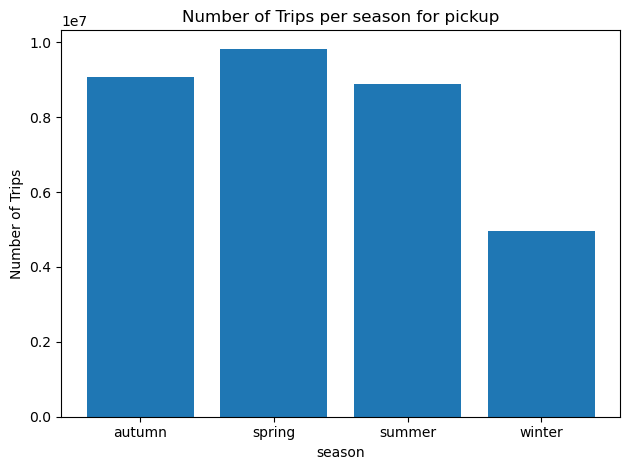

In [30]:
# Calculate the number of trips per 'season'
trips_per_season = filtered_df['season'].value_counts().sort_index()

# Plot the graph
plt.bar(trips_per_season.index, trips_per_season.values)
plt.xlabel('season')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per season for pickup')

# # Rotate x-axis tick labels
# plt.xticks(rotation=45)

plt.tight_layout()  # Adjusts the layout to prevent overlapping labels

plt.show()

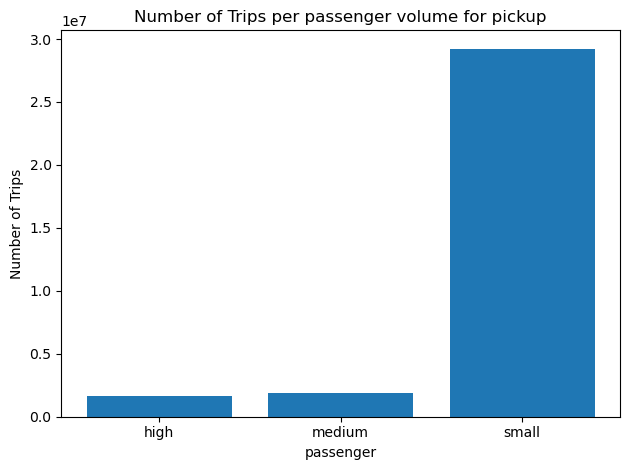

In [31]:
# Calculate the number of trips per 'passenger'
trips_per_pgvolume = filtered_df['passenger'].value_counts().sort_index()

# Plot the graph
plt.bar(trips_per_pgvolume.index, trips_per_pgvolume.values)
plt.xlabel('passenger')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per passenger volume for pickup')

# # Rotate x-axis tick labels
# plt.xticks(rotation=45)

plt.tight_layout()  # Adjusts the layout to prevent overlapping labels

plt.show()

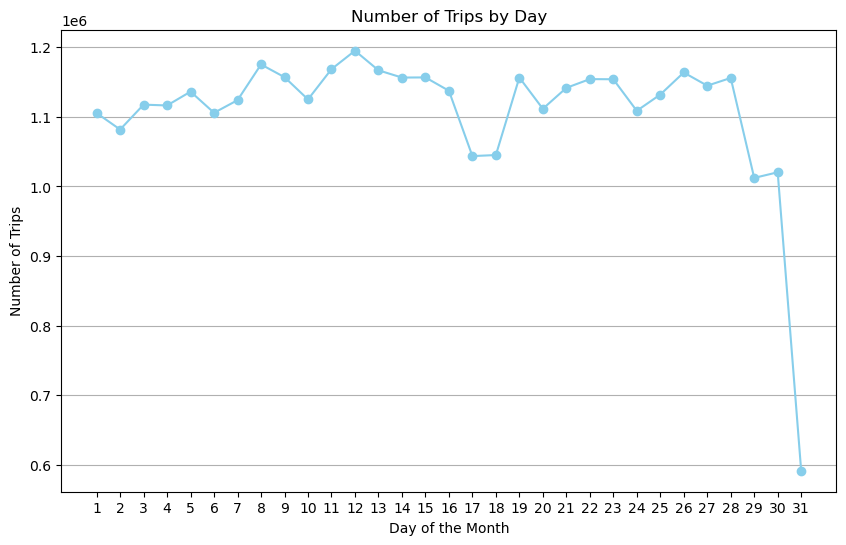

In [32]:
# Assuming your DataFrame is named df
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['day'] = df['tpep_pickup_datetime'].dt.day

# Counting the number of trips for each day
trips_by_day = df['day'].value_counts().sort_index()

# Plotting the number of trips by day
plt.figure(figsize=(10, 6))
plt.plot(trips_by_day.index, trips_by_day.values, color='skyblue', marker='o')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Day')
plt.xticks(range(1, 32))
plt.grid(axis='y')
plt.show()

In [33]:
# Assuming your DataFrame is named df
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['day'] = df['tpep_pickup_datetime'].dt.day

# Counting the number of trips for each day
trips_by_day = df['day'].value_counts().sort_index()

# Print the y-axis value when x-axis is 1
x_value = 1
y_value = trips_by_day[x_value]
print(f"The y-axis value when x-axis is {x_value} is {y_value}")

The y-axis value when x-axis is 1 is 1105535


In [34]:
# Assuming your DataFrame is named df
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['day'] = df['tpep_pickup_datetime'].dt.day

# Counting the number of trips for each day
trips_by_day = df['day'].value_counts().sort_index()

# Print the y-axis value when x-axis is 1
x_value = 31
y_value = trips_by_day[x_value]
print(f"The y-axis value when x-axis is {x_value} is {y_value}")

The y-axis value when x-axis is 31 is 591603


In [35]:
# Assuming your DataFrame is named df
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['day'] = df['tpep_pickup_datetime'].dt.day

# Counting the number of trips for each day
trips_by_day = df['day'].value_counts().sort_index()

# Print the x and y values for each coordinate
for x, y in trips_by_day.items():
    print(f"For x = {x}, y = {y}")

For x = 1, y = 1105535
For x = 2, y = 1081837
For x = 3, y = 1117612
For x = 4, y = 1116429
For x = 5, y = 1136295
For x = 6, y = 1105879
For x = 7, y = 1124039
For x = 8, y = 1175332
For x = 9, y = 1157092
For x = 10, y = 1125126
For x = 11, y = 1168600
For x = 12, y = 1195081
For x = 13, y = 1166947
For x = 14, y = 1156521
For x = 15, y = 1156720
For x = 16, y = 1137560
For x = 17, y = 1043678
For x = 18, y = 1045185
For x = 19, y = 1156568
For x = 20, y = 1111633
For x = 21, y = 1141703
For x = 22, y = 1154283
For x = 23, y = 1154088
For x = 24, y = 1108744
For x = 25, y = 1132059
For x = 26, y = 1163791
For x = 27, y = 1144848
For x = 28, y = 1155934
For x = 29, y = 1012338
For x = 30, y = 1020418
For x = 31, y = 591603


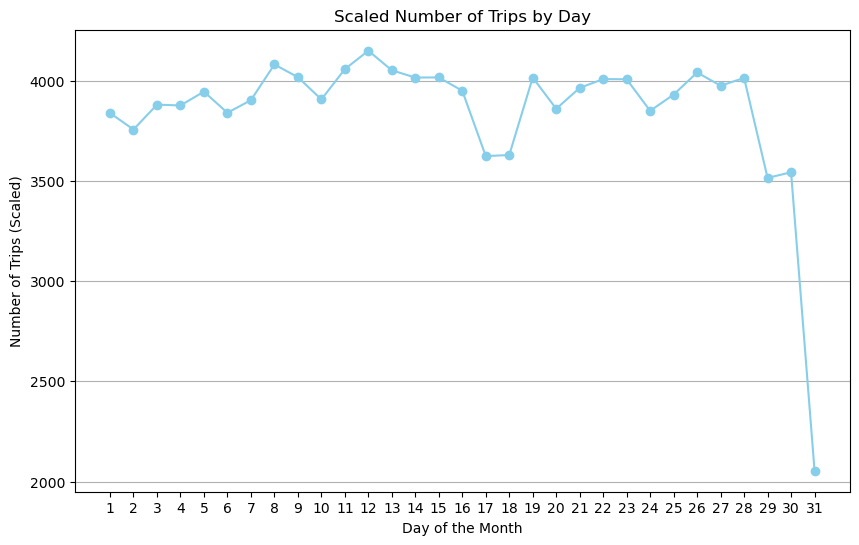

In [36]:
# Assuming your DataFrame is named df
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['day'] = df['tpep_pickup_datetime'].dt.day

# Counting the number of trips for each day
trips_by_day = df['day'].value_counts().sort_index()

# Scale down the y-axis values by dividing by 12
scaled_y = trips_by_day.values / 12 / 24

# Plotting the scaled number of trips by day
plt.figure(figsize=(10, 6))
plt.plot(trips_by_day.index, scaled_y, color='skyblue', marker='o')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips (Scaled)')
plt.title('Scaled Number of Trips by Day')
plt.xticks(range(1, 32))
plt.grid(axis='y')
plt.show()

## Plot graph to see the trend of the number of trips per hour

### For pickup

/var/folders/c1/0p2g0x9n6fq4khgcrhdld8wr0000gn/T/ipykernel_54731/2218919756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['pickup_time'] = filtered_df['pickup_time'].astype(str)
/var/folders/c1/0p2g0x9n6fq4khgcrhdld8wr0000gn/T/ipykernel_54731/2218919756.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hour'] = filtered_df['pickup_time'].str[:2]


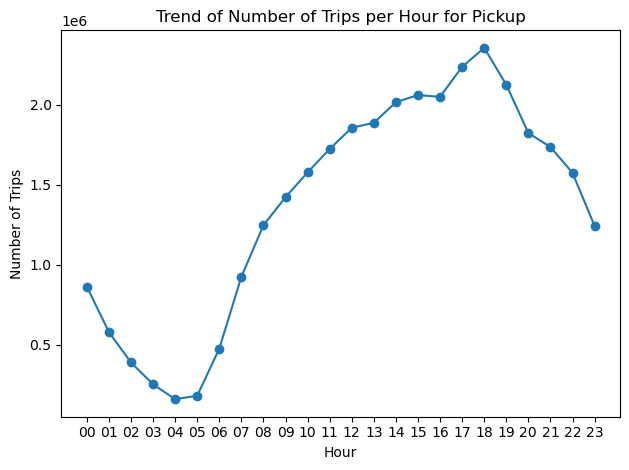

In [37]:
# Convert 'pickup_time' to string format
filtered_df['pickup_time'] = filtered_df['pickup_time'].astype(str)

# Extract the hour component from 'pickup_time'
filtered_df['hour'] = filtered_df['pickup_time'].str[:2]

# Calculate the number of trips per hour
trips_per_hour = filtered_df['hour'].value_counts().sort_index()

# Plot the trend using a line plot
plt.plot(trips_per_hour.index, trips_per_hour.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trend of Number of Trips per Hour for Pickup')

plt.tight_layout()  # Adjusts the layout to prevent overlapping labels

plt.show()

### For dropoff

/var/folders/c1/0p2g0x9n6fq4khgcrhdld8wr0000gn/T/ipykernel_54731/3430966457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['dropoff_time'] = filtered_df['dropoff_time'].astype(str)
/var/folders/c1/0p2g0x9n6fq4khgcrhdld8wr0000gn/T/ipykernel_54731/3430966457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hour'] = filtered_df['dropoff_time'].str[:2]


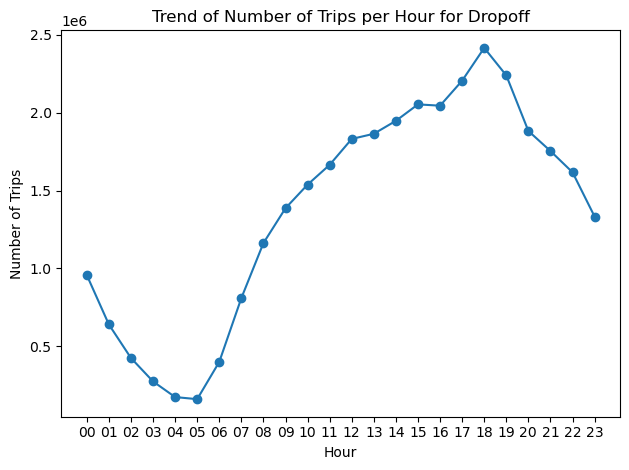

In [38]:
# Convert 'dropoff_time' to string format
filtered_df['dropoff_time'] = filtered_df['dropoff_time'].astype(str)

# Extract the hour component from 'pickup_time'
filtered_df['hour'] = filtered_df['dropoff_time'].str[:2]

# Calculate the number of trips per hour
trips_per_hour = filtered_df['hour'].value_counts().sort_index()

# Plot the trend using a line plot
plt.plot(trips_per_hour.index, trips_per_hour.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trend of Number of Trips per Hour for Dropoff')

plt.tight_layout()  # Adjusts the layout to prevent overlapping labels

plt.show()

## Select features for busyness claculation for pickup_count

In [39]:
pickup_activity = filtered_df[['PULocationID', 'pickup_date', 'pickup_time']]
pickup_activity

,PULocationID,pickup_date,pickup_time
0,142,2022-01-01,00:00:00
1595198,48,2022-01-21,23:00:00
1595197,239,2022-01-21,23:00:00
1595196,229,2022-01-21,23:00:00
1595195,141,2022-01-21,23:00:00
...,...,...,...
34046940,249,2022-11-09,20:00:00
34046939,170,2022-11-09,20:00:00
34046954,90,2022-11-09,20:00:00
34046938,162,2022-11-09,20:00:00


In [40]:
# pickup_activity = filtered_df[['pickup_date', 'PULocationID', 'pickup_time']]
# pickup_activity

In [41]:
# Assuming pickup_activity is your DataFrame
# pickup_activity['pickup_date'] = pd.to_datetime(pickup_activity['pickup_date'])

# Extract month and day
pickup_activity['pickup_date'] = pickup_activity['pickup_date'].dt.strftime('%m-%d')
pickup_activity

/var/folders/c1/0p2g0x9n6fq4khgcrhdld8wr0000gn/T/ipykernel_54731/416263930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_activity['pickup_date'] = pickup_activity['pickup_date'].dt.strftime('%m-%d')


,PULocationID,pickup_date,pickup_time
0,142,01-01,00:00:00
1595198,48,01-21,23:00:00
1595197,239,01-21,23:00:00
1595196,229,01-21,23:00:00
1595195,141,01-21,23:00:00
...,...,...,...
34046940,249,11-09,20:00:00
34046939,170,11-09,20:00:00
34046954,90,11-09,20:00:00
34046938,162,11-09,20:00:00


In [42]:
# Order the rows of the pickup_activity DataFrame by 'PULocationID', 'pickup_date' and then 'pickup_time'
pickup_activity = pickup_activity.sort_values(by=['pickup_date',  'pickup_time', 'PULocationID',])
pickup_activity

,PULocationID,pickup_date,pickup_time
2149,4,01-01,00:00:00
2290,4,01-01,00:00:00
35,4,01-01,00:00:00
1164,4,01-01,00:00:00
1098,4,01-01,00:00:00
...,...,...,...
36131763,264,11-30,23:00:00
36132837,264,11-30,23:00:00
36132810,264,11-30,23:00:00
36132454,264,11-30,23:00:00


In [43]:
pickup_activity = pickup_activity.groupby(['PULocationID', 'pickup_time', 'pickup_date']).size().reset_index(name='pickup_count')
pickup_activity

,PULocationID,pickup_time,pickup_date,pickup_count
0,1,05:00:00,02-25,1
1,1,05:00:00,03-11,1
2,1,06:00:00,07-29,1
3,1,06:00:00,09-14,1
4,1,07:00:00,04-16,1
...,...,...,...,...
583137,265,23:00:00,09-23,1
583138,265,23:00:00,09-26,3
583139,265,23:00:00,10-09,1
583140,265,23:00:00,10-20,1


In [44]:
pickup_activity.head(50)

,PULocationID,pickup_time,pickup_date,pickup_count
0,1,05:00:00,02-25,1
1,1,05:00:00,03-11,1
2,1,06:00:00,07-29,1
3,1,06:00:00,09-14,1
4,1,07:00:00,04-16,1
5,1,07:00:00,06-17,1
6,1,07:00:00,07-17,1
7,1,07:00:00,09-28,1
8,1,08:00:00,01-07,1
9,1,08:00:00,06-12,1


In [45]:
pickup_count_sum = pickup_activity['pickup_count'].sum()
pickup_count_sum

32781256

In [46]:
pickup_activity_without_count = pickup_activity.drop('pickup_count', axis=1)
duplicate_rows = pickup_activity_without_count.duplicated()
duplicate_rows_data = pickup_activity_without_count[duplicate_rows]
duplicate_rows_data

,PULocationID,pickup_time,pickup_date


## Select features for busyness claculation for dropoff_count

In [47]:
dropoff_activity = filtered_df[['DOLocationID', 'dropoff_time', 'dropoff_date']]
dropoff_activity

,DOLocationID,dropoff_time,dropoff_date
0,236,00:00:00,2022-01-01
1595198,68,23:00:00,2022-01-21
1595197,151,23:00:00,2022-01-21
1595196,238,23:00:00,2022-01-21
1595195,230,23:00:00,2022-01-21
...,...,...,...
34046940,211,20:00:00,2022-11-09
34046939,113,20:00:00,2022-11-09
34046954,48,21:00:00,2022-11-09
34046938,162,20:00:00,2022-11-09


In [48]:
# Assuming dropoff_activity is your DataFrame
dropoff_activity['dropoff_date'] = pd.to_datetime(dropoff_activity['dropoff_date'])

# Extract month and day
dropoff_activity['dropoff_date'] = dropoff_activity['dropoff_date'].dt.strftime('%m-%d')
dropoff_activity

/var/folders/c1/0p2g0x9n6fq4khgcrhdld8wr0000gn/T/ipykernel_54731/3075718095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropoff_activity['dropoff_date'] = pd.to_datetime(dropoff_activity['dropoff_date'])
/var/folders/c1/0p2g0x9n6fq4khgcrhdld8wr0000gn/T/ipykernel_54731/3075718095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropoff_activity['dropoff_date'] = dropoff_activity['dropoff_date'].dt.strftime('%m-%d')


,DOLocationID,dropoff_time,dropoff_date
0,236,00:00:00,01-01
1595198,68,23:00:00,01-21
1595197,151,23:00:00,01-21
1595196,238,23:00:00,01-21
1595195,230,23:00:00,01-21
...,...,...,...
34046940,211,20:00:00,11-09
34046939,113,20:00:00,11-09
34046954,48,21:00:00,11-09
34046938,162,20:00:00,11-09


In [49]:
# Order the rows of the dropoff_activity DataFrame by 'DOLocationID', 'dropoff_date' and then 'dropoff_time'
dropoff_activity = dropoff_activity.sort_values(by=['dropoff_date', 'dropoff_time', 'DOLocationID'])
dropoff_activity

,DOLocationID,dropoff_time,dropoff_date
5431,4,00:00:00,01-01
8134,4,00:00:00,01-01
1540,4,00:00:00,01-01
1762,4,00:00:00,01-01
1453,4,00:00:00,01-01
...,...,...,...
36128633,264,22:00:00,12-01
36133660,50,23:00:00,12-01
36258453,68,23:00:00,12-01
36132921,79,23:00:00,12-01


In [50]:
dropoff_activity = dropoff_activity.groupby(['dropoff_date', 'dropoff_time', 'DOLocationID']).size().reset_index(name='dropoff_count')
dropoff_activity

,dropoff_date,dropoff_time,DOLocationID,dropoff_count
0,01-01,00:00:00,4,22
1,01-01,00:00:00,7,20
2,01-01,00:00:00,13,24
3,01-01,00:00:00,15,1
4,01-01,00:00:00,17,4
...,...,...,...,...
940907,12-01,22:00:00,264,1
940908,12-01,23:00:00,50,1
940909,12-01,23:00:00,68,1
940910,12-01,23:00:00,79,1


In [51]:
dropoff_activity.head(50)

,dropoff_date,dropoff_time,DOLocationID,dropoff_count
0,01-01,00:00:00,4,22
1,01-01,00:00:00,7,20
2,01-01,00:00:00,13,24
3,01-01,00:00:00,15,1
4,01-01,00:00:00,17,4
5,01-01,00:00:00,18,1
6,01-01,00:00:00,24,15
7,01-01,00:00:00,25,5
8,01-01,00:00:00,26,1
9,01-01,00:00:00,32,1


In [52]:
dropoff_count_sum = dropoff_activity['dropoff_count'].sum()
dropoff_count_sum

32781256

## busyness calculation

In [53]:
# Rename the columns of the pickup_activity_noHoliday and dropoff_activity_noHoliday DataFrame
pickup_activity.rename(columns={'pickup_time': 'time', 'pickup_date': 'date', 'PULocationID': 'LocationID'}, inplace=True)
dropoff_activity.rename(columns={'dropoff_time': 'time', 'dropoff_date': 'date', 'DOLocationID': 'LocationID'}, inplace=True)

In [54]:
# Create two new DataFrames, one for rows with 'LocationID' in the 'manhattan_ids' list 
# and one for rows with 'LocationID' not in the 'manhattan_ids' list
pickup_activity_in_manhattan = pickup_activity[pickup_activity['LocationID'].isin(manhattan_ids)]
pickup_activity_outside_manhattan = pickup_activity[~pickup_activity['LocationID'].isin(manhattan_ids)]
print(pickup_activity_in_manhattan)
print(pickup_activity_outside_manhattan)

        LocationID      time   date  pickup_count
224              4  00:00:00  01-01            11
225              4  00:00:00  01-02             1
226              4  00:00:00  01-07             1
227              4  00:00:00  01-08            10
228              4  00:00:00  01-09            17
...            ...       ...    ...           ...
575179         263  23:00:00  11-26            91
575180         263  23:00:00  11-27            37
575181         263  23:00:00  11-28            32
575182         263  23:00:00  11-29            58
575183         263  23:00:00  11-30            55

[456708 rows x 4 columns]
        LocationID      time   date  pickup_count
0                1  05:00:00  02-25             1
1                1  05:00:00  03-11             1
2                1  06:00:00  07-29             1
3                1  06:00:00  09-14             1
4                1  07:00:00  04-16             1
...            ...       ...    ...           ...
583137         265  23:

In [55]:
# Got rows for dropoff in manhattan and outside manhattan
dropoff_activity_in_manhattan = dropoff_activity[dropoff_activity['LocationID'].isin(manhattan_ids)]
dropoff_activity_outside_manhattan = dropoff_activity[~dropoff_activity['LocationID'].isin(manhattan_ids)]
print(dropoff_activity_in_manhattan)
print(dropoff_activity_outside_manhattan)

         date      time  LocationID  dropoff_count
0       01-01  00:00:00           4             22
2       01-01  00:00:00          13             24
6       01-01  00:00:00          24             15
13      01-01  00:00:00          41             16
14      01-01  00:00:00          42             15
...       ...       ...         ...            ...
940906  12-01  22:00:00         163              1
940908  12-01  23:00:00          50              1
940909  12-01  23:00:00          68              1
940910  12-01  23:00:00          79              1
940911  12-01  23:00:00         148              1

[489943 rows x 4 columns]
         date      time  LocationID  dropoff_count
1       01-01  00:00:00           7             20
3       01-01  00:00:00          15              1
4       01-01  00:00:00          17              4
5       01-01  00:00:00          18              1
7       01-01  00:00:00          25              5
...       ...       ...         ...            ...
9408

In [56]:
# Assign value of 0 to pickup_count which is outside manhattan
pickup_activity_outside_manhattan = pickup_activity[~pickup_activity['LocationID'].isin(manhattan_ids)].copy()
pickup_activity_outside_manhattan['pickup_count'] = 0

In [57]:
# Assign value of 0 to dropoff_count which is outside manhattan
dropoff_activity_outside_manhattan = dropoff_activity[~dropoff_activity['LocationID'].isin(manhattan_ids)].copy()
dropoff_activity_outside_manhattan['dropoff_count'] = 0

In [58]:
pickup_activity = pd.concat([pickup_activity_in_manhattan, pickup_activity_outside_manhattan])
pickup_activity

,LocationID,time,date,pickup_count
224,4,00:00:00,01-01,11
225,4,00:00:00,01-02,1
226,4,00:00:00,01-07,1
227,4,00:00:00,01-08,10
228,4,00:00:00,01-09,17
...,...,...,...,...
583137,265,23:00:00,09-23,0
583138,265,23:00:00,09-26,0
583139,265,23:00:00,10-09,0
583140,265,23:00:00,10-20,0


In [59]:
null_value_count = pickup_activity.isnull().sum().sum()
null_value_count

0

In [60]:
dropoff_activity = pd.concat([dropoff_activity_in_manhattan, dropoff_activity_outside_manhattan])
dropoff_activity

,date,time,LocationID,dropoff_count
0,01-01,00:00:00,4,22
2,01-01,00:00:00,13,24
6,01-01,00:00:00,24,15
13,01-01,00:00:00,41,16
14,01-01,00:00:00,42,15
...,...,...,...,...
940858,12-01,12:00:00,132,0
940864,12-01,13:00:00,62,0
940872,12-01,14:00:00,1,0
940889,12-01,19:00:00,7,0


In [61]:
null_value_count = dropoff_activity.isnull().sum().sum()
null_value_count

0

In [62]:
activity_df = pd.merge(pickup_activity, dropoff_activity, on=['date', 'time', 'LocationID'], how='outer')
activity_df

,LocationID,time,date,pickup_count,dropoff_count
0,4,00:00:00,01-01,11.0,22.0
1,4,00:00:00,01-02,1.0,10.0
2,4,00:00:00,01-07,1.0,14.0
3,4,00:00:00,01-08,10.0,20.0
4,4,00:00:00,01-09,17.0,37.0
...,...,...,...,...,...
986931,132,12:00:00,12-01,NaN,0.0
986932,62,13:00:00,12-01,NaN,0.0
986933,1,14:00:00,12-01,NaN,0.0
986934,7,19:00:00,12-01,NaN,0.0


In [63]:
num_rows_with_null = activity_df.isnull().any(axis=1).sum()
num_rows_with_null

449818

In [64]:
# fill all the NaN values in the activity_df DataFrame with 0
activity_df = activity_df.fillna(0)
# remove the rows in the activity_df DataFrame where both 'pickup_count' and 'dropoff_count' are 0
activity_df = activity_df[(activity_df['pickup_count'] != 0) | (activity_df['dropoff_count'] != 0)]
activity_df

,LocationID,time,date,pickup_count,dropoff_count
0,4,00:00:00,01-01,11.0,22.0
1,4,00:00:00,01-02,1.0,10.0
2,4,00:00:00,01-07,1.0,14.0
3,4,00:00:00,01-08,10.0,20.0
4,4,00:00:00,01-09,17.0,37.0
...,...,...,...,...,...
621810,163,22:00:00,12-01,0.0,1.0
621811,50,23:00:00,12-01,0.0,1.0
621812,68,23:00:00,12-01,0.0,1.0
621813,79,23:00:00,12-01,0.0,1.0


In [65]:
# Calculate the busyness
activity_df['busyness'] = (activity_df['pickup_count'] + activity_df['dropoff_count']) / 2
activity_df

,LocationID,time,date,pickup_count,dropoff_count,busyness
0,4,00:00:00,01-01,11.0,22.0,16.5
1,4,00:00:00,01-02,1.0,10.0,5.5
2,4,00:00:00,01-07,1.0,14.0,7.5
3,4,00:00:00,01-08,10.0,20.0,15.0
4,4,00:00:00,01-09,17.0,37.0,27.0
...,...,...,...,...,...,...
621810,163,22:00:00,12-01,0.0,1.0,0.5
621811,50,23:00:00,12-01,0.0,1.0,0.5
621812,68,23:00:00,12-01,0.0,1.0,0.5
621813,79,23:00:00,12-01,0.0,1.0,0.5


## Combine with weather data

In [66]:
# Load the weather parquet file into a pandas DataFrame
df_weather = pd.read_parquet('weather_filtered.parquet')

In [67]:
df_weather.shape

(8760, 10)

In [68]:
df_weather

,temp,weather,precip,snow,vis,wind_spd,uv,weather_description,weather_date,weather_time
0,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.00,0.0,13,1.6,0.0,Cloudy,2022-01-01,00:00:00
1,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.00,0.0,14,2.0,0.0,Cloudy,2022-01-01,01:00:00
2,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.50,0.0,11,1.6,0.0,Cloudy,2022-01-01,02:00:00
3,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.00,0.0,11,2.6,0.0,Cloudy,2022-01-01,03:00:00
4,10.0,"{'code': 804, 'description': 'Overcast clouds'...",0.00,0.0,11,2.1,0.0,Cloudy,2022-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...
8755,10.0,"{'code': 500, 'description': 'Light rain', 'ic...",1.00,0.0,4,1.5,0.0,rain,2022-12-31,19:00:00
8756,11.7,"{'code': 500, 'description': 'Light rain', 'ic...",1.25,0.0,5,1.5,0.0,rain,2022-12-31,20:00:00
8757,12.8,"{'code': 500, 'description': 'Light rain', 'ic...",3.25,0.0,6,3.1,0.0,rain,2022-12-31,21:00:00
8758,12.2,"{'code': 500, 'description': 'Light rain', 'ic...",1.50,0.0,6,2.6,0.0,rain,2022-12-31,22:00:00


In [69]:
df_weather.dtypes

temp                   float64
weather                 object
precip                 float64
snow                   float64
vis                      int64
wind_spd               float64
uv                     float64
weather_description     object
weather_date            object
weather_time            object
dtype: object

In [70]:
# Assuming pickup_activity is your DataFrame
df_weather['weather_date'] = pd.to_datetime(df_weather['weather_date'])

# Extract month and day
df_weather['weather_date'] = df_weather['weather_date'].dt.strftime('%m-%d')
df_weather

,temp,weather,precip,snow,vis,wind_spd,uv,weather_description,weather_date,weather_time
0,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.00,0.0,13,1.6,0.0,Cloudy,01-01,00:00:00
1,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.00,0.0,14,2.0,0.0,Cloudy,01-01,01:00:00
2,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.50,0.0,11,1.6,0.0,Cloudy,01-01,02:00:00
3,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.00,0.0,11,2.6,0.0,Cloudy,01-01,03:00:00
4,10.0,"{'code': 804, 'description': 'Overcast clouds'...",0.00,0.0,11,2.1,0.0,Cloudy,01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...
8755,10.0,"{'code': 500, 'description': 'Light rain', 'ic...",1.00,0.0,4,1.5,0.0,rain,12-31,19:00:00
8756,11.7,"{'code': 500, 'description': 'Light rain', 'ic...",1.25,0.0,5,1.5,0.0,rain,12-31,20:00:00
8757,12.8,"{'code': 500, 'description': 'Light rain', 'ic...",3.25,0.0,6,3.1,0.0,rain,12-31,21:00:00
8758,12.2,"{'code': 500, 'description': 'Light rain', 'ic...",1.50,0.0,6,2.6,0.0,rain,12-31,22:00:00


## Combine the dataframes for activity_df_Holiday and activity_df_noHoliday with busyness_level removed

In [71]:
activity_df

,LocationID,time,date,pickup_count,dropoff_count,busyness
0,4,00:00:00,01-01,11.0,22.0,16.5
1,4,00:00:00,01-02,1.0,10.0,5.5
2,4,00:00:00,01-07,1.0,14.0,7.5
3,4,00:00:00,01-08,10.0,20.0,15.0
4,4,00:00:00,01-09,17.0,37.0,27.0
...,...,...,...,...,...,...
621810,163,22:00:00,12-01,0.0,1.0,0.5
621811,50,23:00:00,12-01,0.0,1.0,0.5
621812,68,23:00:00,12-01,0.0,1.0,0.5
621813,79,23:00:00,12-01,0.0,1.0,0.5


In [72]:
activity_df.dtypes

LocationID         int64
time              object
date              object
pickup_count     float64
dropoff_count    float64
busyness         float64
dtype: object

In [73]:
# Get the maximum and minimum values for 'busyness'
max_busyness = activity_df['busyness'].max()
min_busyness = activity_df['busyness'].min()
print(max_busyness)
print(min_busyness)

694.5
0.5


In [74]:
activity_df['time'] = pd.to_datetime(activity_df['time'], format='%H:%M:%S')
activity_df['date'] = pd.to_datetime(activity_df['date'], format='%m-%d')

df_weather['weather_time'] = pd.to_datetime(df_weather['weather_time'], format='%H:%M:%S')
df_weather['weather_date'] = pd.to_datetime(df_weather['weather_date'], format='%m-%d')

In [75]:
merged_data = pd.merge(activity_df, df_weather, left_on=['time', 'date'], right_on=['weather_time', 'weather_date'], how='inner')
merged_data

,LocationID,time,date,pickup_count,dropoff_count,busyness,temp,weather,precip,snow,vis,wind_spd,uv,weather_description,weather_date,weather_time
0,4,1900-01-01 00:00:00,1900-01-01,11.0,22.0,16.5,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.0,0.0,13,1.6,0.0,Cloudy,1900-01-01,1900-01-01 00:00:00
1,12,1900-01-01 00:00:00,1900-01-01,2.0,0.0,1.0,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.0,0.0,13,1.6,0.0,Cloudy,1900-01-01,1900-01-01 00:00:00
2,13,1900-01-01 00:00:00,1900-01-01,11.0,24.0,17.5,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.0,0.0,13,1.6,0.0,Cloudy,1900-01-01,1900-01-01 00:00:00
3,24,1900-01-01 00:00:00,1900-01-01,10.0,15.0,12.5,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.0,0.0,13,1.6,0.0,Cloudy,1900-01-01,1900-01-01 00:00:00
4,41,1900-01-01 00:00:00,1900-01-01,11.0,16.0,13.5,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.0,0.0,13,1.6,0.0,Cloudy,1900-01-01,1900-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495376,163,1900-01-01 22:00:00,1900-12-01,0.0,1.0,0.5,2.2,"{'code': 800, 'description': 'Clear Sky', 'ico...",0.0,0.0,16,2.1,0.0,Clear Sky,1900-12-01,1900-01-01 22:00:00
495377,50,1900-01-01 23:00:00,1900-12-01,0.0,1.0,0.5,2.2,"{'code': 800, 'description': 'Clear Sky', 'ico...",0.0,0.0,11,1.5,0.0,Clear Sky,1900-12-01,1900-01-01 23:00:00
495378,68,1900-01-01 23:00:00,1900-12-01,0.0,1.0,0.5,2.2,"{'code': 800, 'description': 'Clear Sky', 'ico...",0.0,0.0,11,1.5,0.0,Clear Sky,1900-12-01,1900-01-01 23:00:00
495379,79,1900-01-01 23:00:00,1900-12-01,0.0,1.0,0.5,2.2,"{'code': 800, 'description': 'Clear Sky', 'ico...",0.0,0.0,11,1.5,0.0,Clear Sky,1900-12-01,1900-01-01 23:00:00


In [76]:
merged_data = merged_data.drop(['weather_description','weather_time', 'weather_date', 'pickup_count' ,'dropoff_count'], axis=1)
merged_data

,LocationID,time,date,busyness,temp,weather,precip,snow,vis,wind_spd,uv
0,4,1900-01-01 00:00:00,1900-01-01,16.5,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.0,0.0,13,1.6,0.0
1,12,1900-01-01 00:00:00,1900-01-01,1.0,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.0,0.0,13,1.6,0.0
2,13,1900-01-01 00:00:00,1900-01-01,17.5,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.0,0.0,13,1.6,0.0
3,24,1900-01-01 00:00:00,1900-01-01,12.5,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.0,0.0,13,1.6,0.0
4,41,1900-01-01 00:00:00,1900-01-01,13.5,10.6,"{'code': 804, 'description': 'Overcast clouds'...",0.0,0.0,13,1.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...
495376,163,1900-01-01 22:00:00,1900-12-01,0.5,2.2,"{'code': 800, 'description': 'Clear Sky', 'ico...",0.0,0.0,16,2.1,0.0
495377,50,1900-01-01 23:00:00,1900-12-01,0.5,2.2,"{'code': 800, 'description': 'Clear Sky', 'ico...",0.0,0.0,11,1.5,0.0
495378,68,1900-01-01 23:00:00,1900-12-01,0.5,2.2,"{'code': 800, 'description': 'Clear Sky', 'ico...",0.0,0.0,11,1.5,0.0
495379,79,1900-01-01 23:00:00,1900-12-01,0.5,2.2,"{'code': 800, 'description': 'Clear Sky', 'ico...",0.0,0.0,11,1.5,0.0


In [77]:
merged_data = merged_data.drop(['weather'], axis=1)
merged_data

,LocationID,time,date,busyness,temp,precip,snow,vis,wind_spd,uv
0,4,1900-01-01 00:00:00,1900-01-01,16.5,10.6,0.0,0.0,13,1.6,0.0
1,12,1900-01-01 00:00:00,1900-01-01,1.0,10.6,0.0,0.0,13,1.6,0.0
2,13,1900-01-01 00:00:00,1900-01-01,17.5,10.6,0.0,0.0,13,1.6,0.0
3,24,1900-01-01 00:00:00,1900-01-01,12.5,10.6,0.0,0.0,13,1.6,0.0
4,41,1900-01-01 00:00:00,1900-01-01,13.5,10.6,0.0,0.0,13,1.6,0.0
...,...,...,...,...,...,...,...,...,...,...
495376,163,1900-01-01 22:00:00,1900-12-01,0.5,2.2,0.0,0.0,16,2.1,0.0
495377,50,1900-01-01 23:00:00,1900-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0
495378,68,1900-01-01 23:00:00,1900-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0
495379,79,1900-01-01 23:00:00,1900-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0


In [78]:
merged_data['time'] = pd.to_datetime(merged_data['time'], format='%H:%M:%S').dt.time.astype(str)
# merged_data['date'] = merged_data['date'].str.replace('1900', '2022')
merged_data

,LocationID,time,date,busyness,temp,precip,snow,vis,wind_spd,uv
0,4,00:00:00,1900-01-01,16.5,10.6,0.0,0.0,13,1.6,0.0
1,12,00:00:00,1900-01-01,1.0,10.6,0.0,0.0,13,1.6,0.0
2,13,00:00:00,1900-01-01,17.5,10.6,0.0,0.0,13,1.6,0.0
3,24,00:00:00,1900-01-01,12.5,10.6,0.0,0.0,13,1.6,0.0
4,41,00:00:00,1900-01-01,13.5,10.6,0.0,0.0,13,1.6,0.0
...,...,...,...,...,...,...,...,...,...,...
495376,163,22:00:00,1900-12-01,0.5,2.2,0.0,0.0,16,2.1,0.0
495377,50,23:00:00,1900-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0
495378,68,23:00:00,1900-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0
495379,79,23:00:00,1900-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0


In [79]:
merged_data['date'] = merged_data['date'].astype(str).str.replace('1900', '2022')
merged_data

,LocationID,time,date,busyness,temp,precip,snow,vis,wind_spd,uv
0,4,00:00:00,2022-01-01,16.5,10.6,0.0,0.0,13,1.6,0.0
1,12,00:00:00,2022-01-01,1.0,10.6,0.0,0.0,13,1.6,0.0
2,13,00:00:00,2022-01-01,17.5,10.6,0.0,0.0,13,1.6,0.0
3,24,00:00:00,2022-01-01,12.5,10.6,0.0,0.0,13,1.6,0.0
4,41,00:00:00,2022-01-01,13.5,10.6,0.0,0.0,13,1.6,0.0
...,...,...,...,...,...,...,...,...,...,...
495376,163,22:00:00,2022-12-01,0.5,2.2,0.0,0.0,16,2.1,0.0
495377,50,23:00:00,2022-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0
495378,68,23:00:00,2022-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0
495379,79,23:00:00,2022-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0


In [80]:
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['day_of_week'] = merged_data['date'].dt.day_name()
merged_data

,LocationID,time,date,busyness,temp,precip,snow,vis,wind_spd,uv,day_of_week
0,4,00:00:00,2022-01-01,16.5,10.6,0.0,0.0,13,1.6,0.0,Saturday
1,12,00:00:00,2022-01-01,1.0,10.6,0.0,0.0,13,1.6,0.0,Saturday
2,13,00:00:00,2022-01-01,17.5,10.6,0.0,0.0,13,1.6,0.0,Saturday
3,24,00:00:00,2022-01-01,12.5,10.6,0.0,0.0,13,1.6,0.0,Saturday
4,41,00:00:00,2022-01-01,13.5,10.6,0.0,0.0,13,1.6,0.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
495376,163,22:00:00,2022-12-01,0.5,2.2,0.0,0.0,16,2.1,0.0,Thursday
495377,50,23:00:00,2022-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0,Thursday
495378,68,23:00:00,2022-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0,Thursday
495379,79,23:00:00,2022-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0,Thursday


In [81]:
day_to_number = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

merged_data['day_of_week'] = merged_data['day_of_week'].map(day_to_number)
merged_data

,LocationID,time,date,busyness,temp,precip,snow,vis,wind_spd,uv,day_of_week
0,4,00:00:00,2022-01-01,16.5,10.6,0.0,0.0,13,1.6,0.0,5
1,12,00:00:00,2022-01-01,1.0,10.6,0.0,0.0,13,1.6,0.0,5
2,13,00:00:00,2022-01-01,17.5,10.6,0.0,0.0,13,1.6,0.0,5
3,24,00:00:00,2022-01-01,12.5,10.6,0.0,0.0,13,1.6,0.0,5
4,41,00:00:00,2022-01-01,13.5,10.6,0.0,0.0,13,1.6,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...
495376,163,22:00:00,2022-12-01,0.5,2.2,0.0,0.0,16,2.1,0.0,3
495377,50,23:00:00,2022-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0,3
495378,68,23:00:00,2022-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0,3
495379,79,23:00:00,2022-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0,3


In [82]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar 

cal = calendar()
holidays = cal.holidays(start='2022-01-01', end='2022-12-31')

# Check if the pickup date is a holiday and assign day types
merged_data['is_holiday'] = merged_data['date'].isin(holidays)
merged_data

,LocationID,time,date,busyness,temp,precip,snow,vis,wind_spd,uv,day_of_week,is_holiday
0,4,00:00:00,2022-01-01,16.5,10.6,0.0,0.0,13,1.6,0.0,5,False
1,12,00:00:00,2022-01-01,1.0,10.6,0.0,0.0,13,1.6,0.0,5,False
2,13,00:00:00,2022-01-01,17.5,10.6,0.0,0.0,13,1.6,0.0,5,False
3,24,00:00:00,2022-01-01,12.5,10.6,0.0,0.0,13,1.6,0.0,5,False
4,41,00:00:00,2022-01-01,13.5,10.6,0.0,0.0,13,1.6,0.0,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...
495376,163,22:00:00,2022-12-01,0.5,2.2,0.0,0.0,16,2.1,0.0,3,False
495377,50,23:00:00,2022-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False
495378,68,23:00:00,2022-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False
495379,79,23:00:00,2022-12-01,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False


In [83]:
distinct_holidays = merged_data['is_holiday'].unique()
distinct_holidays

array([False,  True])

In [84]:
merged_data['day'] = merged_data['date'].dt.day
merged_data['month'] = merged_data['date'].dt.month
merged_data = merged_data.drop(['date'], axis=1)
merged_data

,LocationID,time,busyness,temp,precip,snow,vis,wind_spd,uv,day_of_week,is_holiday,day,month
0,4,00:00:00,16.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1
1,12,00:00:00,1.0,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1
2,13,00:00:00,17.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1
3,24,00:00:00,12.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1
4,41,00:00:00,13.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495376,163,22:00:00,0.5,2.2,0.0,0.0,16,2.1,0.0,3,False,1,12
495377,50,23:00:00,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12
495378,68,23:00:00,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12
495379,79,23:00:00,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12


In [85]:
merged_data['hour'] = merged_data['time'].apply(lambda x: int(x[:2]))
merged_data

,LocationID,time,busyness,temp,precip,snow,vis,wind_spd,uv,day_of_week,is_holiday,day,month,hour
0,4,00:00:00,16.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0
1,12,00:00:00,1.0,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0
2,13,00:00:00,17.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0
3,24,00:00:00,12.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0
4,41,00:00:00,13.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495376,163,22:00:00,0.5,2.2,0.0,0.0,16,2.1,0.0,3,False,1,12,22
495377,50,23:00:00,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12,23
495378,68,23:00:00,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12,23
495379,79,23:00:00,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12,23


In [86]:
merged_data.dtypes

LocationID       int64
time            object
busyness       float64
temp           float64
precip         float64
snow           float64
vis              int64
wind_spd       float64
uv             float64
day_of_week      int64
is_holiday        bool
day              int32
month            int32
hour             int64
dtype: object

In [87]:
merged_data = merged_data.drop(['time'], axis=1)
merged_data

,LocationID,busyness,temp,precip,snow,vis,wind_spd,uv,day_of_week,is_holiday,day,month,hour
0,4,16.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0
1,12,1.0,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0
2,13,17.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0
3,24,12.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0
4,41,13.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495376,163,0.5,2.2,0.0,0.0,16,2.1,0.0,3,False,1,12,22
495377,50,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12,23
495378,68,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12,23
495379,79,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12,23


In [88]:
# Define a function to assign time slots
def time_slots(hour):
    if hour in range(6, 12):
        return 'Morning'
    elif hour in range(12, 17):
        return 'Afternoon'
    elif hour in range(17, 22):
        return 'Evening'
    else:
        return 'Late Night'
    

merged_data['timeslot'] = merged_data['hour'].apply(time_slots)

In [89]:
merged_data

,LocationID,busyness,temp,precip,snow,vis,wind_spd,uv,day_of_week,is_holiday,day,month,hour,timeslot
0,4,16.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night
1,12,1.0,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night
2,13,17.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night
3,24,12.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night
4,41,13.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495376,163,0.5,2.2,0.0,0.0,16,2.1,0.0,3,False,1,12,22,Late Night
495377,50,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12,23,Late Night
495378,68,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12,23,Late Night
495379,79,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12,23,Late Night


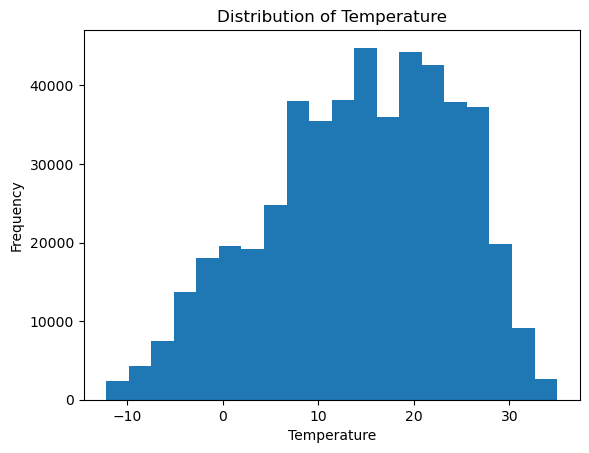

In [90]:
# Plot histogram of feature 'temp'
plt.hist(merged_data['temp'], bins=20)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.show()


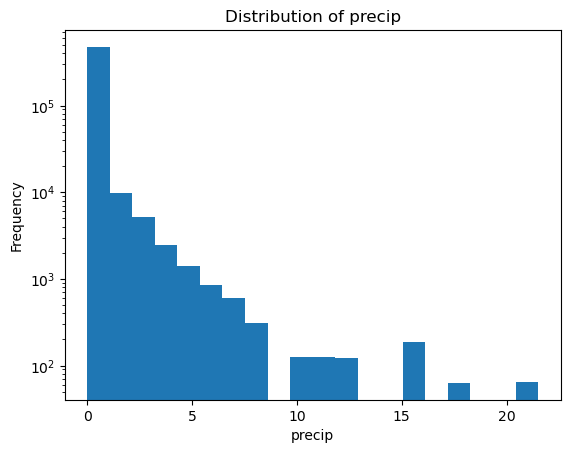

In [92]:
plt.hist(merged_data['precip'], bins=20)
plt.xlabel('precip')
plt.ylabel('Frequency')
plt.title('Distribution of precip')
plt.yscale('log') 
plt.show()


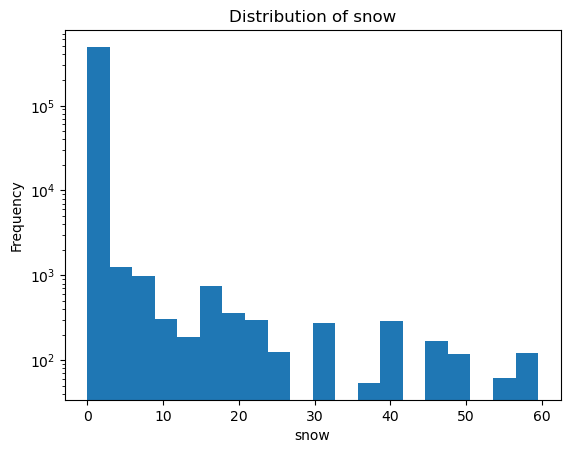

In [94]:
# Plot histogram of feature 'snow'
plt.hist(merged_data['snow'], bins=20)
plt.xlabel('snow')
plt.ylabel('Frequency')
plt.title('Distribution of snow')
plt.yscale('log') 
plt.show()


In [95]:
# # Plot histogram of feature 'vis'
# plt.hist(merged_data['vis'], bins=20)
# plt.xlabel('vis')
# plt.ylabel('Frequency')
# plt.title('Distribution of vis')
# plt.show()


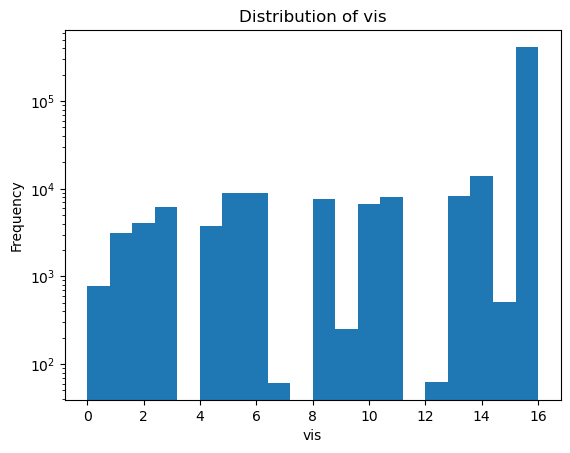

In [96]:
# Plot histogram of feature 'vis'
plt.hist(merged_data['vis'], bins=20)
plt.xlabel('vis')
plt.ylabel('Frequency')
plt.title('Distribution of vis')
plt.yscale('log') 
plt.show()

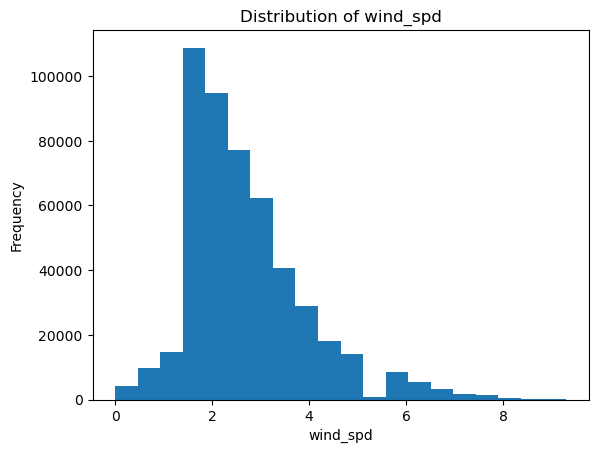

In [97]:
# Plot histogram of feature 'wind_spd'
plt.hist(merged_data['wind_spd'], bins=20)
plt.xlabel('wind_spd')
plt.ylabel('Frequency')
plt.title('Distribution of wind_spd')
plt.show()


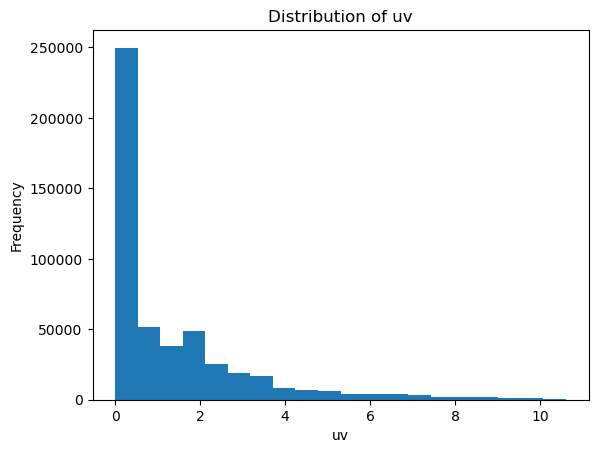

In [98]:
# Plot histogram of feature 'uv'
plt.hist(merged_data['uv'], bins=20)
plt.xlabel('uv')
plt.ylabel('Frequency')
plt.title('Distribution of uv')
plt.show()


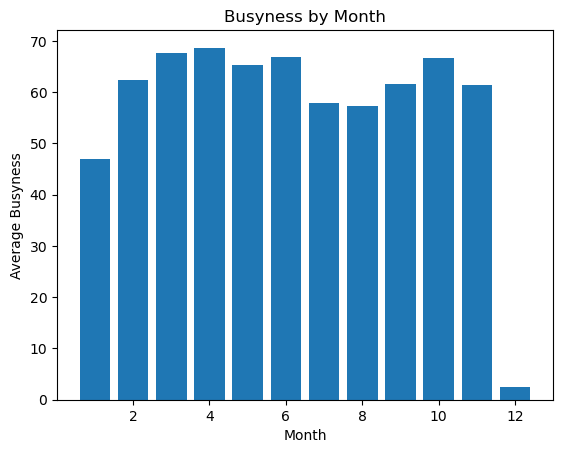

In [99]:
# Group the data by month and calculate the average busyness
busyness_by_month = merged_data.groupby('month')['busyness'].mean()

# Plot the bar plot
plt.bar(busyness_by_month.index, busyness_by_month.values)
plt.xlabel('Month')
plt.ylabel('Average Busyness')
plt.title('Busyness by Month')
plt.show()

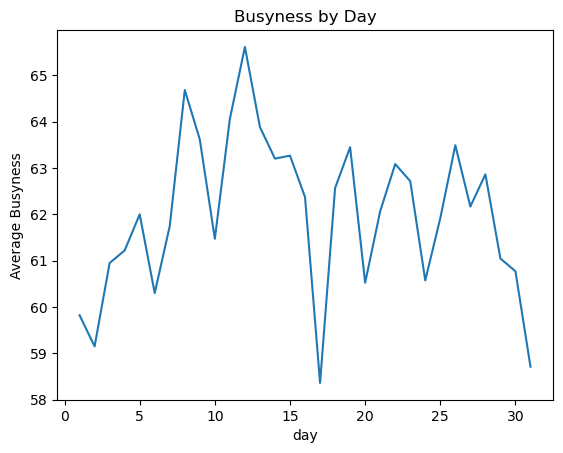

In [100]:
# Group the data by month and calculate the average busyness
busyness_by_month = merged_data.groupby('day')['busyness'].mean()

# Plot the line plot
plt.plot(busyness_by_month.index, busyness_by_month.values)
plt.xlabel('day')
plt.ylabel('Average Busyness')
plt.title('Busyness by Day')
plt.show()

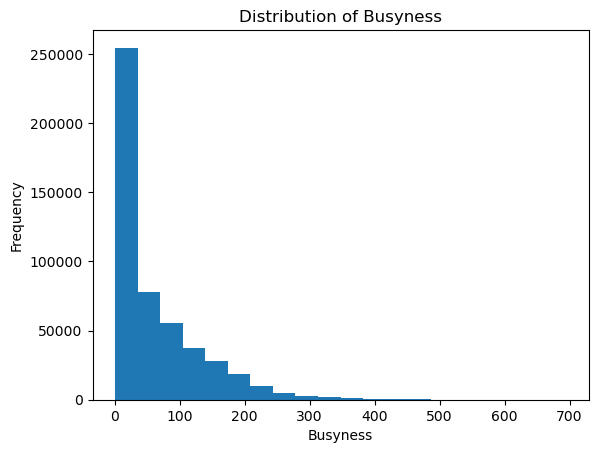

In [102]:
# Plot the histogram of 'busyness'
plt.hist(merged_data['busyness'], bins=20)
plt.xlabel('Busyness')
plt.ylabel('Frequency')
plt.title('Distribution of Busyness')
plt.show()

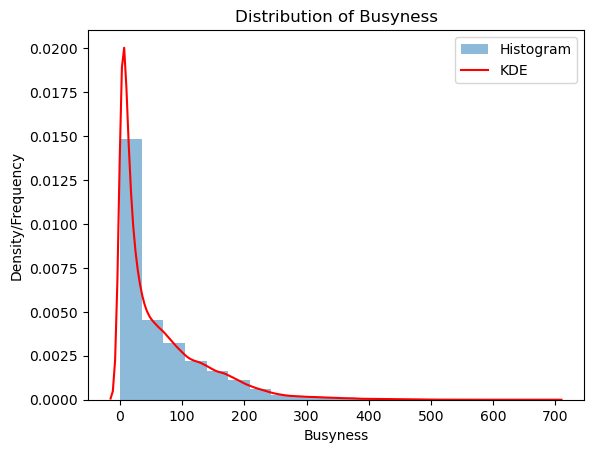

In [103]:
# plot histogram
plt.hist(merged_data['busyness'], bins=20, alpha=0.5, density=True, label='Histogram')

# Plot Kernel Density Estimation Curve
sns.kdeplot(merged_data['busyness'], color='red', label='KDE')

plt.xlabel('Busyness')
plt.ylabel('Density/Frequency')
plt.title('Distribution of Busyness')
plt.legend()
plt.show()

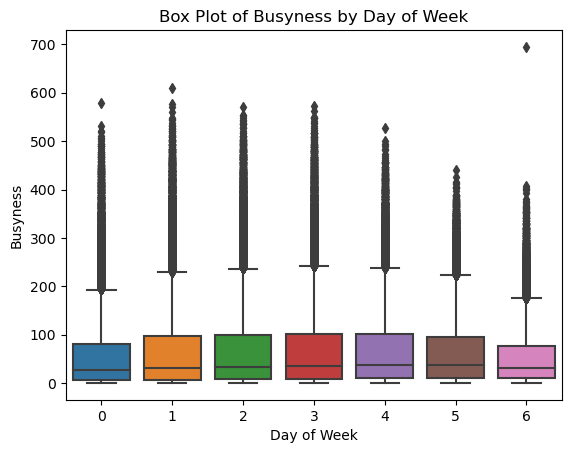

In [104]:
import seaborn as sns

# Plot the box line between 'day_of_week' and 'busyness'
sns.boxplot(x='day_of_week', y='busyness', data=merged_data)
plt.xlabel('Day of Week')
plt.ylabel('Busyness')
plt.title('Box Plot of Busyness by Day of Week')
plt.show()

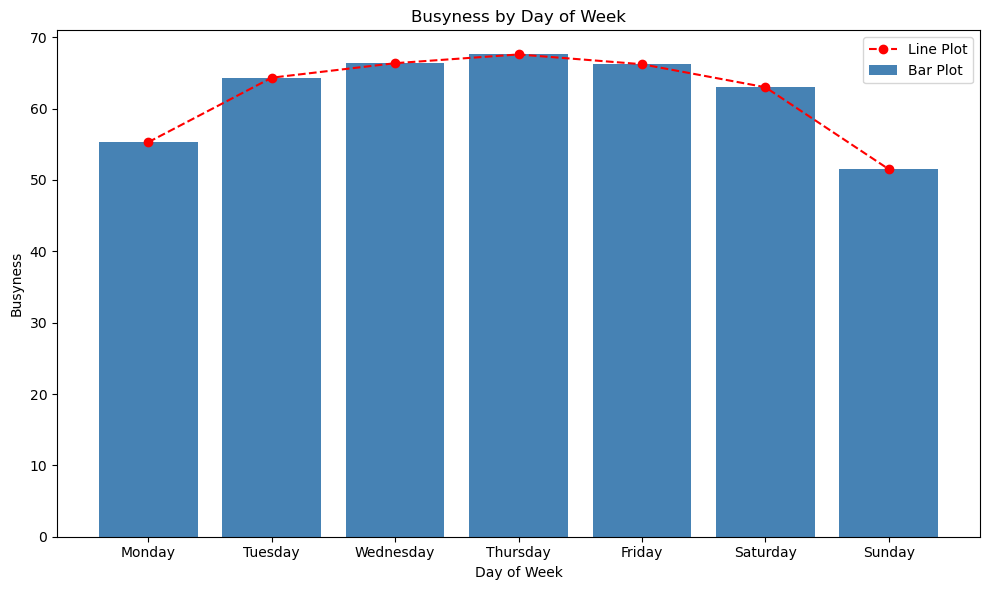

In [105]:
import numpy as np

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the average busyness per day of the week
avg_busyness = merged_data.groupby('day_of_week')['busyness'].mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar plot
ax.bar(np.arange(len(day_order)), merged_data.groupby('day_of_week')['busyness'].mean(), color='steelblue', label='Bar Plot')

# Plot the line plot
ax.plot(np.arange(len(day_order)), avg_busyness, marker='o', linestyle='--', color='red', label='Line Plot')

# Set x-axis labels and ticks
ax.set_xticks(np.arange(len(day_order)))
ax.set_xticklabels(day_order)
ax.set_xlabel('Day of Week')

# Set y-axis label
ax.set_ylabel('Busyness')

# Set plot title
ax.set_title('Busyness by Day of Week')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


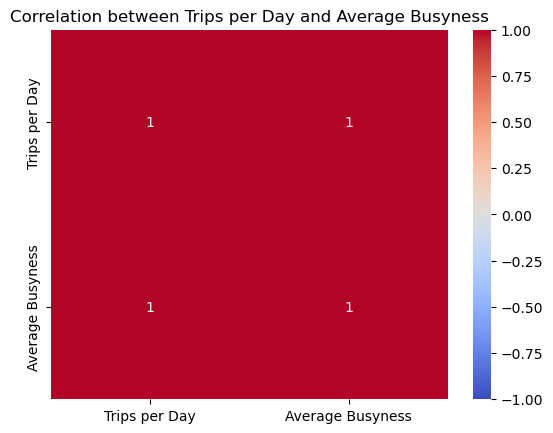

Correlation between Trips per Day and Average Busyness: 1.00


In [106]:
# Calculate the correlation between trips_per_day and avg_busyness
correlation = np.corrcoef(trips_per_day.values, avg_busyness.values)[0, 1]

# Create a correlation heatmap
data = np.array([[1, correlation], [correlation, 1]])
sns.heatmap(data, annot=True, cmap='coolwarm', vmin=-1, vmax=1, xticklabels=['Trips per Day', 'Average Busyness'], yticklabels=['Trips per Day', 'Average Busyness'])
plt.title('Correlation between Trips per Day and Average Busyness')
plt.show()

# Print the correlation value
print(f"Correlation between Trips per Day and Average Busyness: {correlation:.2f}")


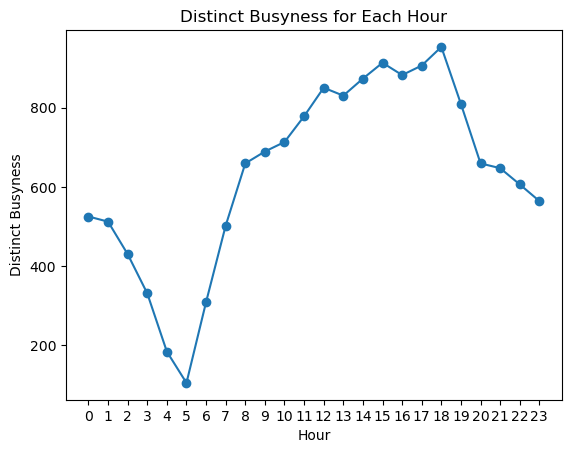

In [107]:
# Group the data by hour and calculate the distinct busyness values for each hour
hourly_busyness = merged_data.groupby('hour')['busyness'].nunique()

# Create a line plot
plt.plot(hourly_busyness.index, hourly_busyness.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Distinct Busyness')
plt.title('Distinct Busyness for Each Hour')
plt.xticks(hourly_busyness.index)
plt.show()

Correlation between Trips per Hour and Distinct Busyness: 0.95


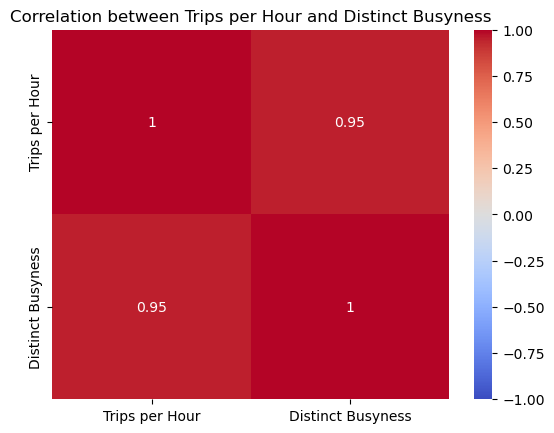

In [108]:
import numpy as np
import seaborn as sns

# Calculate the correlation between trips_per_hour and hourly_busyness
correlation = np.corrcoef(trips_per_hour.values, hourly_busyness.values)[0, 1]

# Print the correlation value
print(f"Correlation between Trips per Hour and Distinct Busyness: {correlation:.2f}")

# Create a correlation heatmap
data = np.array([[1, correlation], [correlation, 1]])
sns.heatmap(data, annot=True, cmap='coolwarm', vmin=-1, vmax=1, xticklabels=['Trips per Hour', 'Distinct Busyness'], yticklabels=['Trips per Hour', 'Distinct Busyness'])
plt.title('Correlation between Trips per Hour and Distinct Busyness')
plt.show()

In [109]:
# Calculate the median, minimum and maximum values of the "busyness" feature
busyness_median = merged_data['busyness'].median()
busyness_min = merged_data['busyness'].min()
busyness_max = merged_data['busyness'].max()
print(f"median: {busyness_median}")
print(f"min: {busyness_min}")
print(f"max: {busyness_max}")

median: 33.0
min: 0.5
max: 694.5


### Define 5 busyness levels

In [115]:
lower_threshold_20 = np.percentile(merged_data['busyness'], 20)
lower_threshold_40 = np.percentile(merged_data['busyness'], 40)
lower_threshold_60 = np.percentile(merged_data['busyness'], 60)
lower_threshold_80 = np.percentile(merged_data['busyness'], 80)

print(f"20th percentile value: {lower_threshold_20}")
print(f"40th percentile value: {lower_threshold_40}")
print(f"60th percentile value: {lower_threshold_60}")
print(f"80th percentile value: {lower_threshold_80}")

labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
merged_data['busy_level'] = pd.cut(merged_data['busyness'], bins=[float('-inf'), lower_threshold_20, lower_threshold_40, lower_threshold_60, lower_threshold_80, float('inf')], labels=labels, include_lowest=True)

level_counts = merged_data['busy_level'].value_counts()
for level, count in level_counts.items():
    print(f"{level}: {count}")

20th percentile value: 6.5
40th percentile value: 20.0
60th percentile value: 52.5
80th percentile value: 112.0
Very Low: 101475
High: 98932
Very High: 98922
Medium: 98740
Low: 97312


In [118]:
filtered_data_veryHigh = merged_data[merged_data['busyness'] > lower_threshold_80]
filtered_data_veryHigh

,LocationID,busyness,temp,precip,snow,vis,wind_spd,uv,day_of_week,is_holiday,day,month,hour,timeslot,busy_level
8,48,123.0,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night,Very High
10,68,118.0,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night,Very High
13,79,181.0,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night,Very High
18,107,114.0,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night,Very High
39,170,152.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468915,48,116.0,20.6,0.0,0.0,16,2.6,0.0,6,False,10,7,23,Late Night,Very High
469008,186,116.5,24.4,0.0,0.0,16,2.6,0.0,6,False,31,7,23,Late Night,Very High
469041,48,128.0,14.4,0.0,0.0,16,4.6,0.0,6,False,23,10,23,Late Night,Very High
469072,186,112.5,14.4,0.0,0.0,16,4.6,0.0,6,False,23,10,23,Late Night,Very High


### Define 3 busyness levels

In [110]:
from scipy.stats import iqr

lower_threshold = np.percentile(merged_data['busyness'], 25)
upper_threshold = np.percentile(merged_data['busyness'], 75)

# print out the result
print(f"25th percentile: {lower_threshold}")
print(f"75th percentile: {upper_threshold}")

labels = ['Low', 'Medium', 'High']
merged_data['busy_level'] = pd.cut(merged_data['busyness'], bins=[float('-inf'), lower_threshold, upper_threshold, float('inf')], labels=labels, include_lowest=True)

level_counts = merged_data['busy_level'].value_counts()
for level, count in level_counts.items():
    print(f"{level}: {count}")


25th percentile: 9.0
75th percentile: 93.0
Medium: 245733
Low: 126262
High: 123386


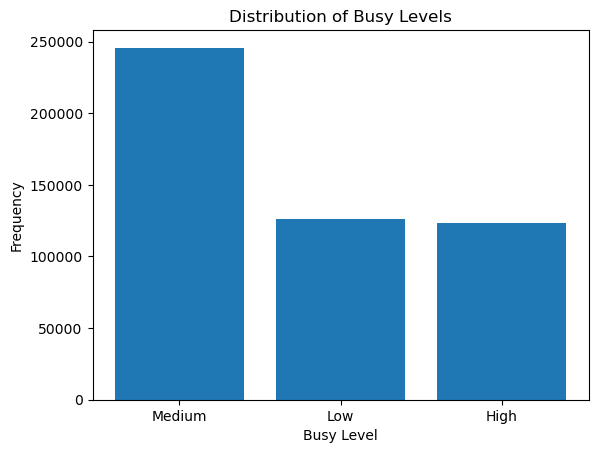

In [111]:
# plot level distribution
level_counts = merged_data['busy_level'].value_counts()
plt.bar(level_counts.index, level_counts.values)
plt.xlabel('Busy Level')
plt.ylabel('Frequency')
plt.title('Distribution of Busy Levels')
plt.show()

In [112]:
merged_data

,LocationID,busyness,temp,precip,snow,vis,wind_spd,uv,day_of_week,is_holiday,day,month,hour,timeslot,busy_level
0,4,16.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night,Medium
1,12,1.0,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night,Low
2,13,17.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night,Medium
3,24,12.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night,Medium
4,41,13.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495376,163,0.5,2.2,0.0,0.0,16,2.1,0.0,3,False,1,12,22,Late Night,Low
495377,50,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12,23,Late Night,Low
495378,68,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12,23,Late Night,Low
495379,79,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12,23,Late Night,Low


In [113]:
# Drop the 'busy_level' feature
merged_data = merged_data.drop('busy_level', axis=1)
merged_data

,LocationID,busyness,temp,precip,snow,vis,wind_spd,uv,day_of_week,is_holiday,day,month,hour,timeslot
0,4,16.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night
1,12,1.0,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night
2,13,17.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night
3,24,12.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night
4,41,13.5,10.6,0.0,0.0,13,1.6,0.0,5,False,1,1,0,Late Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495376,163,0.5,2.2,0.0,0.0,16,2.1,0.0,3,False,1,12,22,Late Night
495377,50,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12,23,Late Night
495378,68,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12,23,Late Night
495379,79,0.5,2.2,0.0,0.0,11,1.5,0.0,3,False,1,12,23,Late Night


In [114]:
# Export the DataFrame to a CSV file
merged_data.to_csv('dataformodeltraining.csv', index=False)